<a href="https://colab.research.google.com/github/victor22-gif/Internet-usage-Analysis-/blob/main/Internet_usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)


pd.set_option('display.max_columns', None)

In [ ]:
data = pd.read_csv('/content/internet_usage.csv')
data = data.drop('Country Code', axis=1)
data.head()

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,..,0.00472257,0.0045614,0.0878913,0.105809,1.22415,2.10712,1.9,1.84,3.55,4,5,5.45455,5.9,7,8.26,11,13.5,16.8,17.6,18.4,..,..,..
1,Albania,0.114097,0.325798,0.390081,0.9719,2.42039,6.04389,9.60999,15.0361,23.86,41.2,45,47,49.4,51.8,54.3,56.9,59.6,62.4,65.4,68.5504,72.2377,79.3237,82.6137,83.1356
2,Algeria,0.491706,0.646114,1.59164,2.19536,4.63448,5.84394,7.37598,9.45119,10.18,11.23,12.5,14.9,18.2,22.5,29.5,38.2,42.9455,47.6911,49.0385,58.9776,60.6534,66.2356,71.2432,..
3,American Samoa,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
4,Andorra,10.5388,..,11.2605,13.5464,26.838,37.6058,48.9368,70.87,70.04,78.53,81,81,82.7,84.4,86.1,87.9,89.7,91.5675,..,90.7187,93.2056,93.8975,94.4855,..


In [ ]:

# Convert all columns to numeric, coercing errors to NaN
for column in data.columns[1:]:  # Assuming the first two columns ('Country Name', 'Country Code') should remain as strings
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Check the new dtypes of the DataFrame
print(data.dtypes)

Country Name     object
2000            float64
2001            float64
2002            float64
2003            float64
2004            float64
2005            float64
2006            float64
2007            float64
2008            float64
2009            float64
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
2022            float64
2023            float64
dtype: object


In [ ]:
len(data)

217

In [ ]:
# Create new country code column

# Assuming you've already loaded your DataFrame and named it 'data'

# List of country codes provided
country_codes = [
    'AF', 'AL', 'DZ', 'AS', 'AD', 'AO', 'AG', 'AR', 'AM', 'AW',
    'AU', 'AT', 'AZ', 'BS', 'BH', 'BD', 'BB', 'BY', 'BE', 'BZ',
    'BJ', 'BM', 'BT', 'BO', 'BA', 'BW', 'BR', 'VG', 'BN', 'BG',
    'BF', 'BI', 'CV', 'KH', 'CM', 'CA', 'KY', 'CF', 'TD', 'JE',
    'CL', 'CN', 'CO', 'KM', 'CD', 'CG', 'CR', 'CI', 'HR', 'CU',
    'CW', 'CY', 'CZ', 'DK', 'DJ', 'DM', 'DO', 'EC', 'EG', 'SV',
    'GQ', 'ER', 'EE', 'SZ', 'ET', 'FO', 'FJ', 'FI', 'FR', 'PF',
    'GA', 'GM', 'GE', 'DE', 'GH', 'GI', 'GR', 'GL', 'GD', 'GU',
    'GT', 'GN', 'GW', 'GY', 'HT', 'HN', 'HK', 'HU', 'IS', 'IN',
    'ID', 'IR', 'IQ', 'IE', 'IM', 'IL', 'IT', 'JM', 'JP', 'JO',
    'KZ', 'KE', 'KI', 'KP', 'KR', 'XK', 'KW', 'KG', 'LA', 'LV',
    'LB', 'LS', 'LR', 'LY', 'LI', 'LT', 'LU', 'MO', 'MG', 'MW',
    'MY', 'MV', 'ML', 'MT', 'MH', 'MR', 'MU', 'MX', 'FM', 'MD',
    'MC', 'MN', 'ME', 'MA', 'MZ', 'MM', 'NA', 'NR', 'NP', 'NL',
    'NC', 'NZ', 'NI', 'NE', 'NG', 'MK', 'MP', 'NO', 'OM', 'PK',
    'PW', 'PA', 'PG', 'PY', 'PE', 'PH', 'PL', 'PT', 'PR', 'QA',
    'RO', 'RU', 'RW', 'WS', 'SM', 'ST', 'SA', 'SN', 'RS', 'SC',
    'SL', 'SG', 'SX', 'SK', 'SI', 'SB', 'SO', 'ZA', 'SS', 'ES',
    'LK', 'KN', 'LC', 'MF', 'VC', 'SD', 'SR', 'SE', 'CH', 'SY',
    'TJ', 'TZ', 'TH', 'TL', 'TG', 'TO', 'TT', 'TN', 'TR', 'TM',
    'TC', 'TV', 'UG', 'UA', 'AE', 'GB', 'US', 'UY', 'UZ', 'VU',
    'VE', 'VN', 'VI', 'PS', 'YE', 'ZM', 'ZW'
]

# Add the new 'Country Code' column to your DataFrame
data['Country Code'] = country_codes

# Verify that the column has been added correctly
print(data[['Country Name', 'Country Code']].head())

len(country_codes)

     Country Name Country Code
0     Afghanistan           AF
1         Albania           AL
2         Algeria           DZ
3  American Samoa           AS
4         Andorra           AD


217

In [ ]:
data.head()

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Country Code
0,Afghanistan,NaN,0.004723,0.004561,0.087891,0.105809,1.22415,2.10712,1.90000,1.84,3.55,4.0,5.0,5.45455,5.9,7.0,8.26,11.0000,13.5000,16.8000,17.6000,18.4000,NaN,NaN,NaN,AF
1,Albania,0.114097,0.325798,0.390081,0.971900,2.420390,6.04389,9.60999,15.03610,23.86,41.20,45.0,47.0,49.40000,51.8,54.3,56.90,59.6000,62.4000,65.4000,68.5504,72.2377,79.3237,82.6137,83.1356,AL
2,Algeria,0.491706,0.646114,1.591640,2.195360,4.634480,5.84394,7.37598,9.45119,10.18,11.23,12.5,14.9,18.20000,22.5,29.5,38.20,42.9455,47.6911,49.0385,58.9776,60.6534,66.2356,71.2432,NaN,DZ
3,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AS
4,Andorra,10.538800,NaN,11.260500,13.546400,26.838000,37.60580,48.93680,70.87000,70.04,78.53,81.0,81.0,82.70000,84.4,86.1,87.90,89.7000,91.5675,NaN,90.7187,93.2056,93.8975,94.4855,NaN,AD


In [ ]:
# First, let's see the structure of your DataFrame
print(data.columns)

# Here's how to reshape the data:
# - 'id_vars' are the columns you want to keep as identifiers
# - 'value_vars' are the columns you want to melt (which are the years in this case)
# - 'var_name' will be the name of the new column for the years
# - 'value_name' will be the name for the internet usage column

data_long = pd.melt(data,
                    id_vars=['Country Name', 'Country Code'],
                    value_vars=[str(year) for year in range(2000, 2024)],  # Assuming years from 2000 to 2023
                    var_name='Year',
                    value_name='Internet Usage')

# Convert the 'Year' column to numeric for easier manipulation later
data_long['Year'] = pd.to_numeric(data_long['Year'])

# Now, you might want to ensure 'Internet Usage' is numeric too:
data_long['Internet Usage'] = pd.to_numeric(data_long['Internet Usage'], errors='coerce')

# Check the result

print(data_long.dtypes)

Index(['Country Name', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023',
       'Country Code'],
      dtype='object')
Country Name       object
Country Code       object
Year                int64
Internet Usage    float64
dtype: object


In [ ]:
df = data_long.copy()
df.head()

,Country Name,Country Code,Year,Internet Usage
0,Afghanistan,AF,2000,NaN
1,Albania,AL,2000,0.114097
2,Algeria,DZ,2000,0.491706
3,American Samoa,AS,2000,NaN
4,Andorra,AD,2000,10.538800


In [ ]:
import pycountry
import pycountry_convert as pc

In [ ]:
def country_to_continent(country_code):
    try:
        return pc.convert_continent_code_to_continent_name(
            pc.country_alpha2_to_continent_code(country_code)
        )
    except (KeyError, AttributeError):
        return 'Unknown'

# Create the 'Continent' column by applying the function to each country code
df['Continent'] = df['Country Code'].apply(country_to_continent)

# Display the first few rows with the new column to verify
print(df[['Country Name', 'Country Code', 'Continent']].head())

# Test with a known country code, like 'US' for United States - this line had syntax errors in your original code
print(country_to_continent('US'))  # Should return 'North America' if working correctly

     Country Name Country Code Continent
0     Afghanistan           AF      Asia
1         Albania           AL    Europe
2         Algeria           DZ    Africa
3  American Samoa           AS   Oceania
4         Andorra           AD    Europe
North America


In [ ]:
df.head()

,Country Name,Country Code,Year,Internet Usage,Continent
0,Afghanistan,AF,2000,NaN,Asia
1,Albania,AL,2000,0.114097,Europe
2,Algeria,DZ,2000,0.491706,Africa
3,American Samoa,AS,2000,NaN,Oceania
4,Andorra,AD,2000,10.538800,Europe


In [ ]:
# check for missing values
print("Missing values\n")
print(df.isnull().sum())
print("\n")
print("Length of data\n")
print(len(df))

Missing values

Country Name        0
Country Code        0
Year                0
Internet Usage    605
Continent           0
dtype: int64


Length of data

5208


In [ ]:
# investigating missing values
missing_data = df[df['Internet Usage'].isna()]

missing_data['Country Name'].value_counts()  # Which countries have missing data?

,count
Country Name,
Turks and Caicos Islands,24
Sint Maarten (Dutch part),24
Channel Islands,24
American Samoa,24
Isle of Man,24
St. Martin (French part),24
Northern Mariana Islands,24
Curacao,22
Kosovo,22


In [ ]:
missing_data['Year'].value_counts()

,count
Year,
2023,158
2018,41
2022,34
2019,31
2021,27
2020,25
2000,21
2003,21
2006,18


In [ ]:
# Some countries lack internet usage data
# we are going to use continent average to fill those missing values
#
df['Internet Usage'] = df.groupby(['Continent', 'Year'])['Internet Usage'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
df.isnull().sum()

,0
Country Name,0
Country Code,0
Year,0
Internet Usage,25
Continent,0


In [ ]:
# re-evaluating the missing data
missing_data = df[df['Internet Usage'].isna()]
print(missing_data[['Country Name', 'Year', 'Continent']])

                   Country Name  Year Continent
172   Sint Maarten (Dutch part)  2000   Unknown
193                 Timor-Leste  2000   Unknown
389   Sint Maarten (Dutch part)  2001   Unknown
410                 Timor-Leste  2001   Unknown
4994             American Samoa  2023   Oceania
5001                  Australia  2023   Oceania
5057                       Fiji  2023   Oceania
5060           French Polynesia  2023   Oceania
5070                       Guam  2023   Oceania
5093                   Kiribati  2023   Oceania
5115           Marshall Islands  2023   Oceania
5119      Micronesia, Fed. Sts.  2023   Oceania
5128                      Nauru  2023   Oceania
5131              New Caledonia  2023   Oceania
5132                New Zealand  2023   Oceania
5137   Northern Mariana Islands  2023   Oceania
5141                      Palau  2023   Oceania
5143           Papua New Guinea  2023   Oceania
5154                      Samoa  2023   Oceania
5163  Sint Maarten (Dutch part)  2023   

In [ ]:
# drop NaN
df = df.dropna()

In [ ]:
# re-evaluating the missing data
missing_data = df[df['Internet Usage'].isna()]
print(missing_data[['Country Name', 'Year', 'Continent']])

Empty DataFrame
Columns: [Country Name, Year, Continent]
Index: []


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5183 entries, 0 to 5207
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    5183 non-null   object 
 1   Country Code    5183 non-null   object 
 2   Year            5183 non-null   int64  
 3   Internet Usage  5183 non-null   float64
 4   Continent       5183 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 243.0+ KB


Now we can perform our analysis

In [ ]:
def analyze_internet_usage(df):
    """
    Comprehensive analysis of internet usage data across countries and continents.

    Parameters:
    df (pandas.DataFrame): DataFrame with columns Country Name, Country Code, Year,
                         Internet Usage, and Continent

    Returns:
    dict: Dictionary containing analysis results
    """
    analysis = {}

    # 1. Global trends
    yearly_avg = df.groupby('Year')['Internet Usage'].mean()
    analysis['global_trend'] = yearly_avg

    # 2. Continental analysis
    continental_latest = df[df['Year'] == df['Year'].max()].groupby('Continent')['Internet Usage'].agg([
        'mean', 'median', 'std', 'min', 'max'
    ])
    analysis['continental_stats'] = continental_latest

    # 3. Top and bottom countries
    latest_year = df['Year'].max()
    latest_data = df[df['Year'] == latest_year]

    top_countries = latest_data.nlargest(10, 'Internet Usage')[
        ['Country Name', 'Internet Usage']
    ]
    bottom_countries = latest_data.nsmallest(10, 'Internet Usage')[
        ['Country Name', 'Internet Usage']
    ]

    analysis['top_countries'] = top_countries
    analysis['bottom_countries'] = bottom_countries

    # 4. Growth analysis
    # Calculate 5-year growth rates for countries
    five_year_growth = calculate_growth_rates(df, years=5)
    analysis['growth_rates'] = five_year_growth

    # 5. Digital divide analysis
    latest_distribution = latest_data['Internet Usage'].describe()
    analysis['usage_distribution'] = latest_distribution

    # 6. Regional disparities
    continental_disparity = latest_data.groupby('Continent').agg({
        'Internet Usage': ['mean', 'std', 'count']
    })
    analysis['continental_disparity'] = continental_disparity

    return analysis

def calculate_growth_rates(df, years=5):
    """
    Calculate growth rates over specified period for each country.
    """
    latest_year = df['Year'].max()
    start_year = latest_year - years

    latest_data = df[df['Year'] == latest_year]
    past_data = df[df['Year'] == start_year]

    growth_df = pd.merge(
        latest_data[['Country Name', 'Internet Usage']],
        past_data[['Country Name', 'Internet Usage']],
        on='Country Name',
        suffixes=('_latest', '_past')
    )

    growth_df['growth_rate'] = ((growth_df['Internet Usage_latest'] -
                                growth_df['Internet Usage_past']) /
                               growth_df['Internet Usage_past'] * 100)

    return growth_df.sort_values('growth_rate', ascending=False)

def plot_analysis(df, analysis_results):
    """
    Create visualizations for the analysis results.
    """
    # 1. Global trend plot
    plt.figure(figsize=(12, 6))
    analysis_results['global_trend'].plot(kind='line')
    plt.title('Global Internet Usage Trend')
    plt.xlabel('Year')
    plt.ylabel('Average Internet Usage (%)')
    plt.grid(True)
    plt.tight_layout()

    # 2. Continental boxplot
    plt.figure(figsize=(12, 6))
    latest_year_data = df[df['Year'] == df['Year'].max()]
    sns.boxplot(x='Continent', y='Internet Usage', data=latest_year_data)
    plt.title(f'Internet Usage Distribution by Continent ({df["Year"].max()})')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # 3. Top 10 countries bar plot
    plt.figure(figsize=(12, 6))
    top_10 = analysis_results['top_countries']
    plt.barh(top_10['Country Name'], top_10['Internet Usage'])
    plt.title(f'Top 10 Countries by Internet Usage ({df["Year"].max()})')
    plt.xlabel('Internet Usage (%)')
    plt.tight_layout()

def generate_report(analysis_results):
    """
    Generate a text report summarizing the analysis findings.
    """
    latest_year = analysis_results['global_trend'].index.max()

    report = f"""
Internet Usage Analysis Report ({latest_year})

1. Global Overview:
- Global average internet usage: {analysis_results['global_trend'][latest_year]:.1f}%
- From {analysis_results['global_trend'].index.min()} to {latest_year}, global usage increased by {(analysis_results['global_trend'][latest_year] - analysis_results['global_trend'].iloc[0]):.1f} percentage points

2. Continental Analysis:
{analysis_results['continental_stats'].to_string()}

3. Top Performing Countries:
{analysis_results['top_countries'].head().to_string()}

4. Digital Divide Statistics:
{analysis_results['usage_distribution'].to_string()}

5. Growth Analysis:
- Fastest growing countries (5-year growth rate):
{analysis_results['growth_rates'].head().to_string()}
"""
    return report

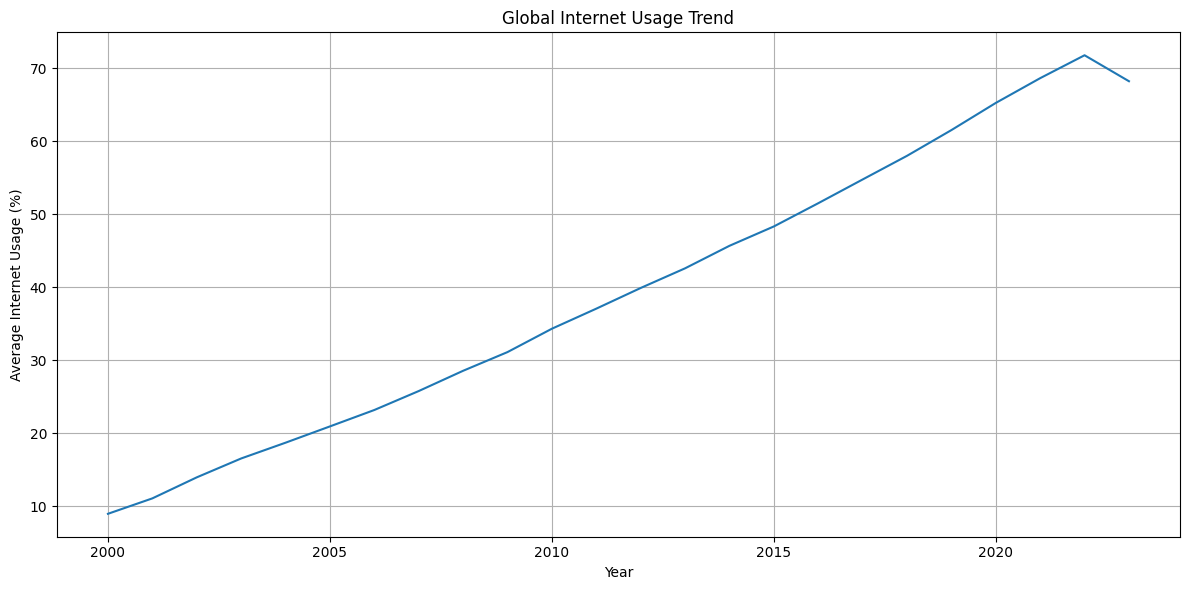

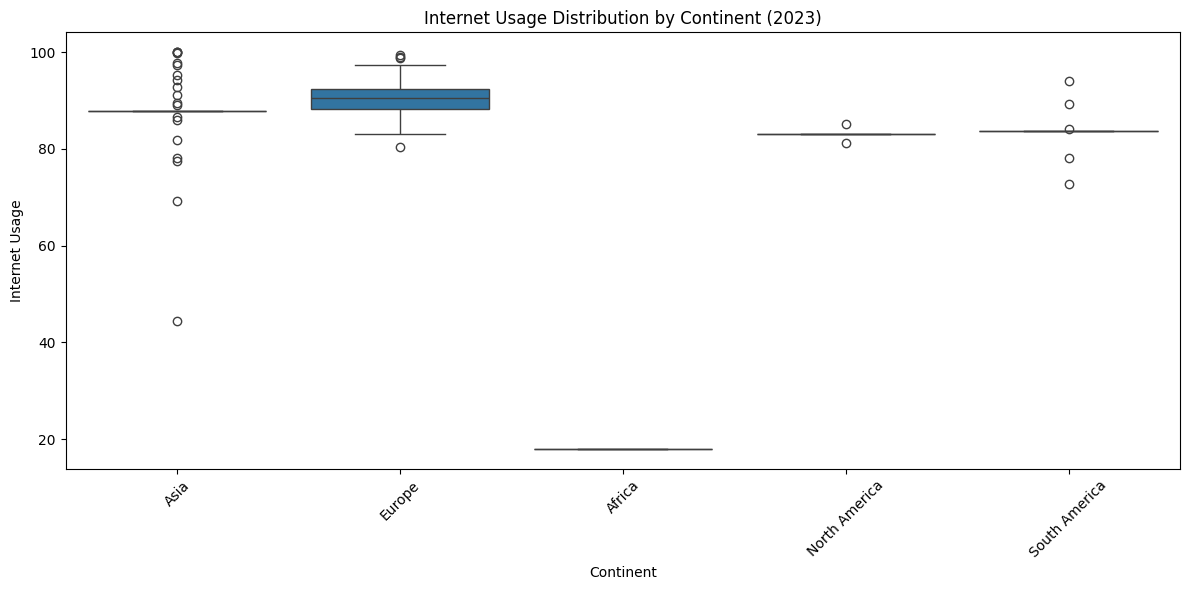

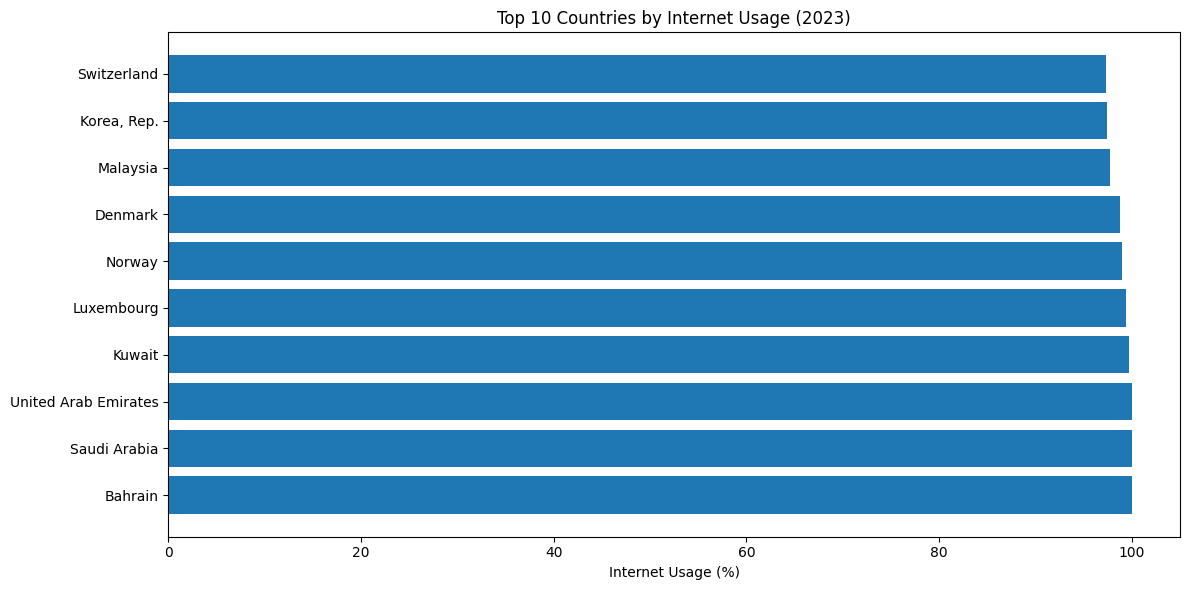

In [ ]:
results = analyze_internet_usage(df)

# display the plots
plot_analysis(df, results)
plt.show()

In [ ]:
# see the text report
print(generate_report(results))


Internet Usage Analysis Report (2023)

1. Global Overview:
- Global average internet usage: 68.3%
- From 2000 to 2023, global usage increased by 59.3 percentage points

2. Continental Analysis:
                    mean     median       std      min       max
Continent                                                       
Africa         18.000000  18.000000  0.000000  18.0000   18.0000
Asia           87.936784  87.936784  8.391184  44.5027  100.0000
Europe         90.591906  90.591906  4.246373  80.3896   99.3479
North America  83.155100  83.155100  0.492975  81.1832   85.1270
South America  83.657580  83.657580  5.151057  72.6943   94.1192

3. Top Performing Countries:
              Country Name  Internet Usage
5005               Bahrain        100.0000
5157          Saudi Arabia        100.0000
5195  United Arab Emirates        100.0000
5097                Kuwait         99.7473
5107            Luxembourg         99.3479

4. Digital Divide Statistics:
count    196.000000
mean      6